# Support Vector Machines

Copyright 2018 Wes Barnett

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.io as sio
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## 1 Support vector machines

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params, alpha=0.2)
    return out

In [3]:
df = sio.loadmat('ex6data1.mat')
X = pd.DataFrame(df['X'], dtype='float32')
y = pd.Series(df['y'].ravel(), dtype='int32')

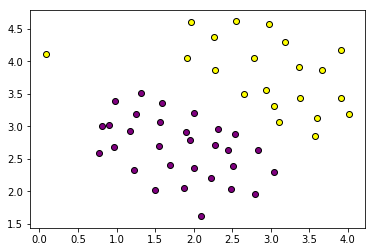

In [4]:
plt.scatter(X.loc[y==1,0], X.loc[y==1,1], color="yellow", marker='o', edgecolor='black')
plt.scatter(X.loc[y==0,0], X.loc[y==0,1], color="purple", marker='o', edgecolor='black')
plt.show()

In [5]:
clf = svm.SVC(kernel='linear')

In [6]:
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

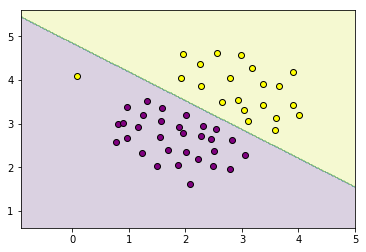

In [7]:
xx, yy = make_meshgrid(X[0], X[1])
ax = plt.subplot(111)
plot_contours(ax, clf, xx, yy)
ax.scatter(X.loc[y==1,0], X.loc[y==1,1], color="yellow", marker='o', edgecolor='black')
ax.scatter(X.loc[y==0,0], X.loc[y==0,1], color="purple", marker='o', edgecolor='black')

In [8]:
clf = svm.SVC(C=100., kernel='linear')

In [9]:
clf.fit(X, y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

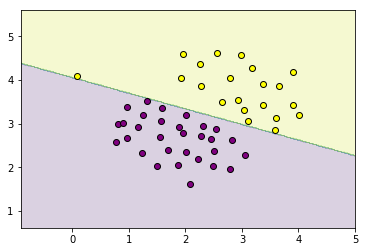

In [10]:
xx, yy = make_meshgrid(X[0], X[1])
ax = plt.subplot(111)
plot_contours(ax, clf, xx, yy)
ax.scatter(X.loc[y==1,0], X.loc[y==1,1], color="yellow", marker='o', edgecolor='black')
ax.scatter(X.loc[y==0,0], X.loc[y==0,1], color="purple", marker='o', edgecolor='black')

In [11]:
df = sio.loadmat('ex6data2.mat')
X = pd.DataFrame(df['X'], dtype='float32')
y = pd.Series(df['y'].ravel(), dtype='int32')

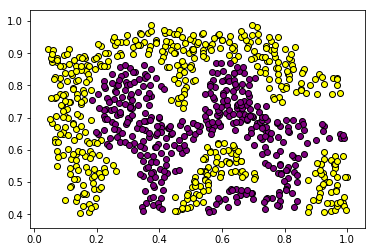

In [12]:
plt.scatter(X.loc[y==1,0], X.loc[y==1,1], color="yellow", marker='o', edgecolor='black')
plt.scatter(X.loc[y==0,0], X.loc[y==0,1], color="purple", marker='o', edgecolor='black')
plt.show()

In [13]:
# gamma = 1.0 / sigma
clf = svm.SVC(C=1.0, gamma=10.0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(0.35, 1.05)

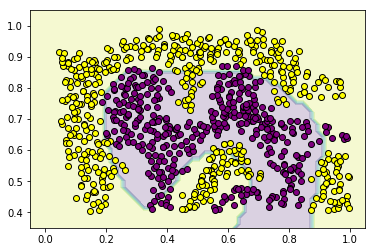

In [14]:
xx, yy = make_meshgrid(X[0], X[1])
ax = plt.subplot(111)
plot_contours(ax, clf, xx, yy)
ax.scatter(X.loc[y==1,0], X.loc[y==1,1], color="yellow", marker='o', edgecolor='black')
ax.scatter(X.loc[y==0,0], X.loc[y==0,1], color="purple", marker='o', edgecolor='black')
ax.set_xlim([-0.05,1.05])
ax.set_ylim([0.35,1.05])

In [15]:
df = sio.loadmat('ex6data3.mat')
X = pd.DataFrame(df['X'], dtype='float32')
y = pd.Series(df['y'].ravel(), dtype='int32')

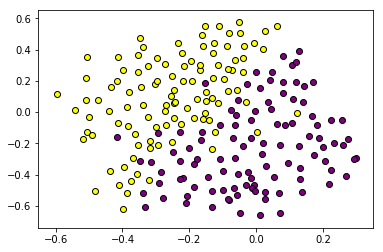

In [16]:
plt.scatter(X.loc[y==1,0], X.loc[y==1,1], color="yellow", marker='o', edgecolor='black')
plt.scatter(X.loc[y==0,0], X.loc[y==0,1], color="purple", marker='o', edgecolor='black')
plt.show()

In [17]:
param_grid = {"C": [0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.],
              "gamma": [0.03, 0.1, 0.3, 1., 3., 10., 30., 100.]}
grid = GridSearchCV(clf, param_grid).fit(X, y)

(-0.7, 0.65)

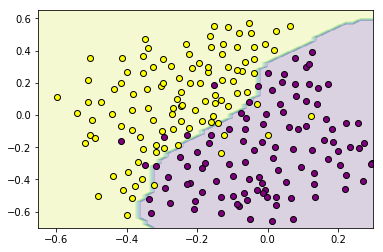

In [18]:
xx, yy = make_meshgrid(X[0], X[1])
ax = plt.subplot(111)
plot_contours(ax, grid, xx, yy)
ax.scatter(X.loc[y==1,0], X.loc[y==1,1], color="yellow", marker='o', edgecolor='black')
ax.scatter(X.loc[y==0,0], X.loc[y==0,1], color="purple", marker='o', edgecolor='black')
ax.set_xlim([-0.65,0.3])
ax.set_ylim([-0.7,0.65])

## 2 Spam classification

In [19]:
import re
import string
from nltk.stem.porter import PorterStemmer

In [20]:
with open('emailSample1.txt') as f:
    file_contents = f.read()

In [21]:
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

### 2.1 Preprocessing and feature extraction

In [22]:
df_vocab = pd.read_csv('vocab.txt', delim_whitespace=True, header=None, 
                       index_col=0)
df_vocab.head()

,1
0,
1,aa
2,ab
3,abil
4,abl
5,about


In [23]:
def processEmail(email, df_vocab):
    word_list = []
    stemmer = PorterStemmer()
    email = email.lower()
    email = re.sub('\n', ' ', email)
    email = re.sub('[0-9]+', 'number', email)
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email)
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)
    email = re.sub('[$]+', 'dollar', email)
    table = str.maketrans({key: None for key in string.punctuation})
    email = email.translate(table)
    for i in email.split():
        word_list.append(stemmer.stem(i))
    # print(word_list)
    # Instead of finding the index of a word in the vocab list and this mapping
    # it to a feature vector as in the original problem, we can just do it all
    # at once here
    X = df_vocab[1].isin(word_list)
    return X.astype(int)

In [24]:
X = processEmail(file_contents, df_vocab)

### 2.2 Train SVM

In [25]:
df = sio.loadmat('spamTrain.mat')
X_train = df['X']
y_train = df['y']
df = sio.loadmat('spamTest.mat')
X_test = df['Xtest']
y_test = df['ytest']

In [26]:
clf = svm.SVC(C=0.1, kernel='linear')
clf.fit(X_train, y_train.ravel())

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
print("Training accuracy: {0:.3}".format(clf.score(X_train, y_train)))

Training accuracy: 0.998


In [28]:
print("Test accuracy: {0:.3}".format(clf.score(X_test, y_test)))

Test accuracy: 0.989


### 2.3 Top predictors for spam

In [29]:
# Sort the weights (coefficients) in *ascending* order
sorted_coef = np.argsort(clf.coef_)[0]

In [30]:
# Find out the top predictors using the index of the weights
df_vocab.iloc[sorted_coef[-1:-16:-1]]

,1
0,
1191,our
298,click
1398,remov
739,guarante
1796,visit
156,basenumb
477,dollar
1852,will
1299,price


### 2.4 Trying your own emails

0 = not spam

1 = spam

In [32]:
with open('spamSample1.txt') as f:
    sample = f.read()
X_pred = processEmail(sample, df_vocab)
clf.predict(X_pred.values.reshape(1,-1))

array([1], dtype=uint8)

In [33]:
sample

'Do You Want To Make $1000 Or More Per Week?\n\n \n\nIf you are a motivated and qualified individual - I \nwill personally demonstrate to you a system that will \nmake you $1,000 per week or more! This is NOT mlm.\n\n \n\nCall our 24 hour pre-recorded number to get the \ndetails.  \n\n \n\n000-456-789\n\n \n\nI need people who want to make serious money.  Make \nthe call and get the facts. \n\nInvest 2 minutes in yourself now!\n\n \n\n000-456-789\n\n \n\nLooking forward to your call and I will introduce you \nto people like yourself who\nare currently making $10,000 plus per week!\n\n \n\n000-456-789\n\n\n\n3484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72\n\n'

In [34]:
with open('spamSample2.txt') as f:
    sample = f.read()
X_pred = processEmail(sample, df_vocab)
clf.predict(X_pred.values.reshape(1,-1))

array([1], dtype=uint8)

In [35]:
sample

'Best Buy Viagra Generic Online\n\nViagra 100mg x 60 Pills $125, Free Pills & Reorder Discount, Top Selling 100% Quality & Satisfaction guaranteed!\n\nWe accept VISA, Master & E-Check Payments, 90000+ Satisfied Customers!\nhttp://medphysitcstech.ru\n\n\n'